## Exploratory Data Analyisis

In [2]:
#import modin.pandas as pd
#df = pd.read_csv('https://s3.eu-central-1.amazonaws.com/maastrichtuniversity-ids-open/lex2rdf/cases_full.csv',
#                dtype={"year_lodge": object, "month_lodge": object})

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [2]:
metadata = pd.read_csv('../data/cases_metadata.csv')
countries = pd.read_csv('../data/countries.csv')
subjects = pd.read_csv('../data/subjects.csv')
citations = pd.read_csv('../data/citations.csv')
#citations['paragraph'] = citations['target'] + '-' + citations['paragraph']

In [3]:
metadata.columns

Index(['source', 'case_label', 'ecli', 'case_type', 'judge', 'advocate',
       'country', 'country-chamber', 'chamber', 'main_subject', 'lodge_date',
       'document_date', 'year_document', 'month_document', 'year_lodge',
       'month_lodge', 'case_time', 'n_countries', 'joined_cases',
       'ruling_title', 'ruling_name', 'ruling_type', 'ruling_content'],
      dtype='object')

In [4]:
len(metadata['source'].unique())

13357

In [5]:
len(metadata['case_label'].unique())

13223

In [6]:
len(metadata['ecli'].unique())

13357

In [7]:
metadata.groupby('case_type').count()['source']

case_type
Judgement    11374
Order         1983
Name: source, dtype: int64

In [8]:
len(metadata['judge'].unique())

98

In [9]:
len(metadata[metadata['year_document'] >=2017]['judge'].unique())

27

In [10]:
metadata.groupby('judge').count()['source'].sort_values(ascending=False).head()

judge
Rosas                  285
Jann                   280
Moitinho de Almeida    272
Toader                 269
IleÅ¡iÄ               268
Name: source, dtype: int64

In [11]:
metadata[metadata['joined_cases'] ==1].groupby('judge').count()['source'].sort_values(ascending=False).head()
#What happen with joined cases

judge
Koopmans               29
Due                    28
Moitinho de Almeida    28
Pescatore              27
Gulmann                26
Name: source, dtype: int64

Plots de barras (colorear el pais si se puede)

In [12]:
len(metadata['advocate'].unique())

111

In [13]:
len(metadata[metadata['year_document'] >=2017]['advocate'].unique())

25

In [14]:
metadata.groupby('advocate').count()['source'].sort_values(ascending=False).head()

advocate
Kokott       774
Mengozzi     646
Bot          640
Sharpston    626
Jacobs       609
Name: source, dtype: int64

In [15]:
len(countries['country'].unique())

63

In [16]:
countries.groupby('country').count()['source'].sort_values(ascending=False).head()

country
Germany          2651
Italy            1678
not_specified    1437
France           1276
Netherlands      1109
Name: source, dtype: int64

In [17]:
len(countries)

14100

Pie de los paises

In [82]:
df_cm = countries.merge(metadata.loc[:, metadata.columns != 'country'], on='source', how='left')
len(df_cm)

14100

This can be exploted in tableau

In [20]:
#merge_[merge_['year_document']>=2017].groupby('subject').count()['source'].sort_values(ascending=False).head()

In [21]:
metadata[metadata['year_document']>=2000].groupby('country-chamber').count()['source'].sort_values(ascending=False).head()

country-chamber
Germany-First Chamber     189
Germany-Second Chamber    181
Germany-Fifth Chamber     172
Germany-Third Chamber     170
Germany-Sixth Chamber     143
Name: source, dtype: int64

In [22]:
years = sorted(metadata['year_document'].unique())
nan_chamber = []
for year in years:
    group = metadata[metadata['year_document'] == year].groupby('chamber').count()
    nan_chamber.append(group.loc['not_specified']['source']/group['source'].sum()*100)

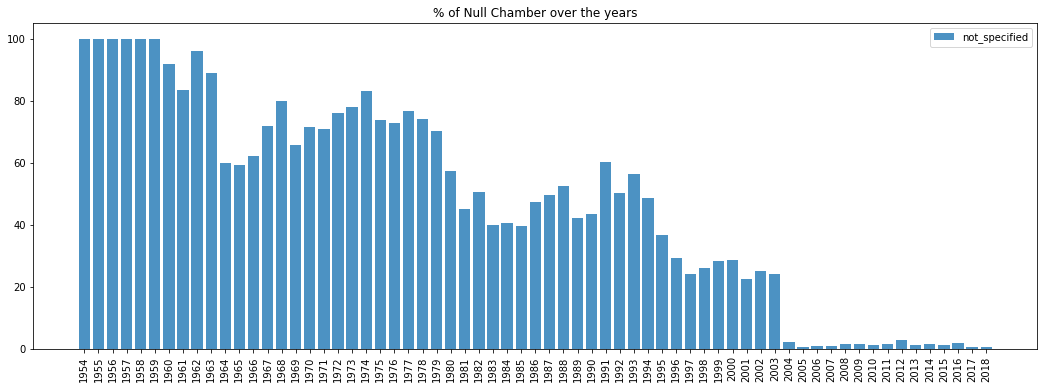

In [23]:
plt.figure(figsize=(18, 6))
position = range(len(years))
plt.bar(position, nan_chamber, align='center', alpha=0.8, label='not_specified')
plt.xticks(position, years, rotation=90)
plt.legend(loc='best')
plt.title('% of Null Chamber over the years')
plt.show()

In [24]:
len(subjects['subject'].unique())

181

In [25]:
subjects.groupby('subject').count()['source'].sort_values(ascending=False).head()

subject
Approximation of laws          4401
Agriculture and Fisheries      3182
Right of establishment         3149
Freedom to provide services    2966
Free movement of goods         2654
Name: source, dtype: int64

In [26]:
len(subjects)

54897

In [27]:
df_sm = subjects.merge(metadata, on='source', how='left')
len(df_sm)

54897

In [28]:
df_sm[df_sm['year_document']>=2017].groupby('subject').count()['source'].sort_values(ascending=False).head()

subject
Approximation of laws          339
Right of establishment         241
Freedom to provide services    191
Taxation                       136
Competition                    113
Name: source, dtype: int64

In [29]:
top_list = list(subjects.groupby('subject').count()['source'].sort_values(ascending=False).head(10).index)

In [30]:
df_sm_filter = df_sm[(df_sm['year_document'] >= 1990) & (df_sm['year_document'] < 2018)]

In [31]:
years = sorted([int(i) for i in df_sm_filter['year_document'].unique()])

In [32]:
plot_traces = []
for i in range(len(top_list)):
    series = df_sm_filter[df_sm_filter['subject'] == top_list[i]].groupby('year_document').count()['source']
    trace = go.Scatter(x = years, y = series, mode = 'lines+markers', name = top_list[i])
    plot_traces.append(trace)

In [107]:
py.iplot(plot_traces, filename='Time Series of Number of Cases by Subject')

In [49]:
metadata.groupby('year_document').count()['source'].sort_values(ascending=False).head()

year_document
2016    587
2013    564
2017    556
2014    544
2015    509
Name: source, dtype: int64

In [52]:
abosolute_j = metadata[metadata['case_type'] == 'Judgement'].groupby('year_document').count()['source']
relative_j = [round(i*100/abosolute_j.sum(),2) for i in abosolute_j]
abosolute_o = metadata[metadata['case_type'] == 'Order'].groupby('year_document').count()['source']
relative_o = [round(i*100/abosolute_o.sum(),2) for i in abosolute_o]

In [50]:
full_years = list(abosolute_j.index)

In [55]:
trace1 = go.Scatter(x = full_years, y = relative_j, mode = 'lines+markers', name = 'Judgements')
trace2 = go.Scatter(x = full_years, y = relative_o, mode = 'lines+markers', name = 'Orders')

In [106]:
py.iplot([trace1, trace2], filename='Time Series Relative Cases')

Do all the countries behave the same through time?

In [63]:
pd.to_datetime(metadata['lodge_date'],format= '%Y/%m/%d').head()

0   1997-04-17
1   1995-02-10
2   1995-03-13
3   1994-11-22
4   1998-07-24
Name: lodge_date, dtype: datetime64[ns]

In [64]:
metadata['lodge_date'] = pd.to_datetime(metadata['lodge_date'],format= '%Y/%m/%d')
metadata['document_date'] = pd.to_datetime(metadata['document_date'],format= '%Y/%m/%d')

In [65]:
metadata['case_time'] = metadata['document_date'] - metadata['lodge_date']

In [66]:
metadata['case_time'].describe()

count                       13357
mean     531 days 13:57:59.793366
std      283 days 06:17:24.710953
min               0 days 00:00:00
25%             349 days 00:00:00
50%             510 days 00:00:00
75%             671 days 00:00:00
max            3954 days 00:00:00
Name: case_time, dtype: object

A plot of the time of the case over the time of the top 10 countries

In [72]:
#metadata['case_time']

In [77]:
#metadata.groupby('year_document').describe()['case_time']['mean']

In [84]:
df_cm[df_cm['year_document']>=2017].groupby('country').count()['source'].sort_values(ascending=False).head()

country
Germany           125
Italy              77
Spain              57
France             47
United Kingdom     42
Name: source, dtype: int64

In [93]:
top_countries = list(df_cm.groupby('country').count()['source'].sort_values(ascending=False).head(10).index)

In [98]:
test = df_cm[df_cm['country'] == 'Germany'].groupby('year_document').describe()['case_time']['mean'].astype('timedelta64[D]')

In [104]:
plot_countries = []
for i in range(len(top_countries)):
    series = df_cm[df_cm['country'] == top_countries[i]].groupby('year_document').describe()['case_time']['mean'].astype('timedelta64[D]')
    trace = go.Scatter(x = years, y = series, mode = 'lines', name = top_countries[i])
    plot_countries.append(trace)

In [105]:
py.iplot(plot_countries, filename='Time Series Average Case Duration by Country')

In [5]:
metadata.columns

Index(['source', 'case_label', 'ecli', 'case_type', 'judge', 'advocate',
       'country', 'country-chamber', 'chamber', 'main_subject', 'lodge_date',
       'document_date', 'year_document', 'month_document', 'year_lodge',
       'month_lodge', 'case_time', 'n_countries', 'joined_cases',
       'ruling_title', 'ruling_name', 'ruling_type', 'ruling_content'],
      dtype='object')

In [88]:
metadata.groupby('ruling_name').count()['source'].sort_values(ascending=False).head()

ruling_name
 Commission of the European Communities v Italian Republic.                346
 Commission of the European Communities v French Republic.                 192
 Commission of the European Communities v Kingdom of Belgium.              182
 Commission of the European Communities v Hellenic Republic.               158
 Commission of the European Communities v Federal Republic of Germany.     127
Name: source, dtype: int64

In [89]:
metadata.groupby('ruling_type').count()['source'].sort_values(ascending=False).head()

ruling_type
not_specified                                                             6621
 Reference for a preliminary ruling: Bundesfinanzhof - Germany.            176
 Reference for a preliminary ruling: Finanzgericht Hamburg - Germany.       88
 Reference for a preliminary ruling: Bundesgerichtshof - Germany.           80
 Reference for a preliminary ruling: Hoge Raad - Netherlands.               72
Name: source, dtype: int64

In [90]:
metadata.groupby('ruling_content').count()['source'].sort_values(ascending=False).head()

ruling_content
 Taxation of costs.                                                 43
 Inadmissibility.                                                   42
 Removal from the register.                                         28
 Reference for a preliminary ruling: Bundesfinanzhof - Germany.     23
 Additional levy on milk.                                           23
Name: source, dtype: int64

In [95]:
citations['relation'] = citations['source']+'-'+citations['target']
citations['unique'] = citations['source']+'-'+citations['target']+'-'+citations['paragraph']
citations['citation'] = citations['target']+'-'+citations['paragraph']

In [105]:
citations.head()

,source,target,paragraph,relation,unique,citation
0,62016CJ0267,61987CJ0215,N22,62016CJ0267-61987CJ0215,62016CJ0267-61987CJ0215-N22,61987CJ0215-N22
1,62016CJ0267,61987CJ0215,N67,62016CJ0267-61987CJ0215,62016CJ0267-61987CJ0215-N67,61987CJ0215-N67
2,62016CJ0267,62001CJ0030,N63,62016CJ0267-62001CJ0030,62016CJ0267-62001CJ0030-N63,62001CJ0030-N63
3,62016CJ0267,62001CJ0030,N34,62016CJ0267-62001CJ0030,62016CJ0267-62001CJ0030-N34,62001CJ0030-N34
4,62016CJ0267,62001CJ0030,N53,62016CJ0267-62001CJ0030,62016CJ0267-62001CJ0030-N53,62001CJ0030-N53


#### Unique paragraph citations  (target-paragraph)

In [96]:
df_citations = citations.groupby('citation').agg('count')['source'].reset_index()

In [97]:
df_citations.sort_values(['source'], ascending=False).head(10)

,citation,source
21262,61990CJ0320-N06,48
2279,61974CJ0008-N5,47
84075,62010CJ0072-N6,46
25199,61992CO0157-N04,40
18484,61989CJ0106-N08,36
87694,62010CJ0617-N19,36
23136,61991CJ0267-N16,35
1203,61970CJ0022-N42,34
14493,61986CJ0267-N16,33
23918,61992CJ0091-N26,30


The most cited [paragraph](https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1528814213715&uri=CELEX:61974CJ0008)

#### Unique cited cases (target -> source)

In [98]:
df_ = citations.groupby(['target','source']).agg('count')['citation'].reset_index()
df_target = df_.groupby('target')['citation'].agg(['count','sum']).reset_index()
df_target.columns = ['target','sources','target_paragraphs']

In [99]:
df_target.sort_values('sources',ascending=False).head(10)

,target,sources,target_paragraphs
4363,61998CJ0352,165,275
3214,61993CJ0415,159,521
5449,62002CJ0189,149,406
4382,61998CJ0379,128,306
428,61974CJ0008,128,341
2992,61992CJ0136,105,206
4879,62000CJ0204,87,189
2697,61990CJ0320,85,267
3568,61995CJ0185,80,185
5892,62003CJ0551,80,117


The most cited [case](https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1528816320947&uri=CELEX:61993CJ0415)

#### Unique relations (source -> target)

In [100]:
#table on relation level
df_relations = citations.groupby(['source','relation']).agg('count')['paragraph'].reset_index()

In [101]:
#it is necessary to revise the methodology since it's poossible to check the number of paragrphs in eu-lex, and may not match ith the count method
#df_relations.sort_values(['paragraph'], ascending=False).head(10)

In [102]:
df_source = df_relations.groupby('source')['paragraph'].agg(['count','sum']).reset_index() 
df_source.columns = ['source','targets','source_paragraphs']

In [103]:
df_source.sort_values(['targets'], ascending=False).head(10)

,source,targets,source_paragraphs
7634,62010CJ0539,55,222
8569,62012CJ0382,50,140
5601,62005CJ0341,49,240
6704,62008CJ0384,49,59
9872,62015CJ0072,48,260
5875,62006CJ0268,44,83
5964,62006CJ0413,44,61
7567,62010CJ0416,44,100
6642,62008CJ0280,44,66
6187,62007CJ0208,42,144


The case that cites the [most](https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1528817250200&uri=CELEX:62010CJ0539)

Make  function to automate dataset creation from pandas queries that can be consumed by tableau or neo4j

In [109]:
#parsing pandas to lines for networkx to read#parsin 
lines = [j+' '+citations['target'][idx] for idx, j in enumerate([i for i in citations['source']]) ]

In [9]:
# Using an small graph
g = nx.parse_edgelist(lines, create_using=nx.DiGraph())

In [10]:
# Using an small graph
#g = nx.read_edgelist('orders_general_filter.txt',create_using=nx.DiGraph())

In [11]:
nodes, edges = g.order(), g.size()

In [12]:
avg_deg = float(nodes)/edges

In [13]:
print ('Nodes: {}\nEdges: {}\nAvg Degree: {}'.format(nodes, edges, avg_deg) )

Nodes: 11578
Edges: 58333
Avg Degree: 0.19848113417790958


## Centrality Measures

In [14]:
def centrality_table(centrality_output):
    table = pd.DataFrame([i for i in centrality_output.items()]).sort_values(by=1, ascending=False)
    table.columns = ['Node','Centrality']
    return table

**Degree centrality**  
For particular node is the fraction of nodes it is connected to. We might assume that the node with highest value it's the more connected judgement across the network

In [14]:
degree = nx.degree_centrality(g)
df_degree = centrality_table(degree)
df_degree.head(10)

,Node,Centrality
3502,61993CJ0415,0.014425
9534,62002CJ0189,0.012093
299,61974CJ0008,0.011056
10924,61998CJ0379,0.010797
7536,62000CJ0204,0.009588
7360,62002CJ0255,0.008465
3100,62004CJ0446,0.008379
896,61992CJ0136,0.008206
4287,61999CJ0238,0.008033
8376,62004CJ0344,0.007860


**Closeness centrality**   

Notice that higher values of closeness indicate higher centrality. Literaly we might say that is a "heavy" node, which influences others and it's very in the center of the network

In [15]:
closeness = nx.closeness_centrality(g)
df_closeness = centrality_table(closeness)
df_closeness.head(10)

,Node,Centrality
10329,61981CJ0008,0.145819
299,61974CJ0008,0.140403
8624,61984CJ0152,0.140383
5697,61976CJ0033,0.136915
3502,61993CJ0415,0.135670
6897,61975CJ0043,0.134770
8126,61983CJ0014,0.133693
438,61977CJ0106,0.133375
7503,61978CJ0120,0.133174
1842,61984CJ0222,0.130741


**Communicability**   
How good the nodes can reach others

In [16]:
#not for diricted graph
#communicability = nx.communicability(g)
#df_communicability = centrality_summary(communicability)
#df_communicability.head(10)

**Betweenness centrality**   
The highest betweenness the highest control over the network, because more information will pass through that node

In [15]:
betweenness = nx.betweenness_centrality(g)

In [16]:
df_betweenness = centrality_table(betweenness)
df_betweenness.head(10)

,Node,Centrality
1485,62004CJ0344,0.003539
11422,61993CJ0415,0.002531
9215,62002CJ0189,0.002485
11377,62010CJ0188,0.002444
64,62003CJ0210,0.002405
2966,62006CJ0268,0.002087
6675,62010CJ0617,0.002083
9903,62001CJ0491,0.002046
2987,62005CJ0341,0.001964
11511,62007CJ0169,0.001865
